In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [4]:
y = data['Admitted']
x1 = data['SAT']

In [5]:
#Using Stats model
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
results_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

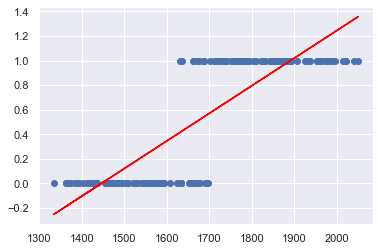

In [9]:
plt.scatter(x1, y)
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1, y_hat, color='red')

In [10]:
##LOgistic Regression with statsmodel

In [11]:
reg_log = sm.Logit(y,x)

In [12]:
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [14]:
results_log.predict(x)

0      0.000003
1      0.995321
2      0.999995
3      0.382546
4      0.047469
5      0.978241
6      0.990490
7      0.999913
8      0.999932
9      0.028056
10     0.999694
11     0.999883
12     0.495824
13     0.000003
14     0.768780
15     0.999589
16     0.211009
17     0.218087
18     0.232751
19     0.999667
20     0.999999
21     0.999999
22     0.000038
23     0.001401
24     0.911780
25     0.999878
26     0.218087
27     0.996921
28     0.999571
29     0.984988
         ...   
138    0.000025
139    0.010866
140    0.998611
141    0.982290
142    0.703787
143    0.989665
144    0.998874
145    0.015140
146    0.001523
147    0.000005
148    0.000016
149    0.829131
150    0.999995
151    0.999987
152    0.999125
153    0.999932
154    0.999087
155    0.000580
156    1.000000
157    0.999589
158    0.009999
159    1.000000
160    0.047469
161    0.999988
162    0.997605
163    0.918308
164    0.973292
165    0.009999
166    0.002739
167    0.000195
Length: 168, dtype: floa

In [15]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Jun 2019   Pseudo R-squ.:                  0.7992
Time:                        15:46:21   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
x0 = np.ones(168)
x0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:

reg_log1 = sm.Logit(y, x0)
results_log1 = reg_log1.fit()
results_log1.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Sun, 16 Jun 2019   Pseudo R-squ.:               7.410e-11
Time:                        15:52:57   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

In [19]:
raw_data = pd.read_csv('2.02. Binary predictors.csv')
raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [20]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [21]:
y = data['Admitted']
x1 = data['Gender']

In [22]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


In [24]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Jun 2019   Pseudo R-squ.:                  0.1659
Time:                        16:10:14   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [27]:
np.exp(2.0786) * 100

799.3270498536442

In [28]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [29]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


In [31]:
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


In [32]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Jun 2019   Pseudo R-squ.:                  0.8249
Time:                        16:13:23   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [34]:
np.exp(0.0406)

1.0414354480403178

In [40]:
cm = pd.DataFrame(results_log.pred_table(), columns=['Predicted 0','Prediceted 1'], index=['Actual 0','Actual 1'])

In [41]:
cm

,Predicted 0,Prediceted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [42]:
cm2 = pd.DataFrame(results_log.pred_table(), columns=['Predicted -ve','Prediceted +ve'], index=['Actual False','Actual True'])

In [43]:
cm2

,Predicted -ve,Prediceted +ve
Actual False,69.0,5.0
Actual True,4.0,90.0


In [ ]:
Accuracy = (TP + TN)/Total
Recall/Sensitivity = TP/(TP + )
Specificity = TN / (TN + FP)
